In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.transforms import ToTensor

In [ ]:
!cd /content
!mkdir Data

In [ ]:
!unzip /content/Fall.zip -d /content/Data

Archive:  /content/Fall.zip
   creating: /content/Data/Fall/
  inflating: /content/Data/Fall/train_labels.csv  
  inflating: /content/Data/Fall/test_labels.csv  
   creating: /content/Data/Fall/train_images/
  inflating: /content/Data/Fall/train_images/fall-11-cam1-rgb-125.jpg  
  inflating: /content/Data/Fall/train_images/fall-11-cam1-rgb-044.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-100.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-072.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-016.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-010.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-081.jpg  
  inflating: /content/Data/Fall/train_images/fall-11-cam1-rgb-123.jpg  
  inflating: /content/Data/Fall/train_images/fall-11-cam1-rgb-091.jpg  
  inflating: /content/Data/Fall/train_images/fall-11-cam1-rgb-117.jpg  
  inflating: /content/Data/Fall/train_images/fall-02-cam1-rgb-031.jpg  


In [ ]:
!cd Data/Fall/
!ls

Data  Fall.zip	sample_data


In [ ]:
training_label = pd.read_csv("/content/Data/Fall/train_labels.csv")
training_label

,images,labels
0,fall-02-cam1-rgb-001.jpg,0
1,fall-02-cam1-rgb-002.jpg,0
2,fall-02-cam1-rgb-003.jpg,0
3,fall-02-cam1-rgb-004.jpg,0
4,fall-02-cam1-rgb-005.jpg,0
...,...,...
235,fall-11-cam1-rgb-126.jpg,1
236,fall-11-cam1-rgb-127.jpg,1
237,fall-11-cam1-rgb-128.jpg,1
238,fall-11-cam1-rgb-129.jpg,1


In [ ]:
class CNN(nn.Module):
  def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 , 32)
        self.fc2 = nn.Linear(32, 1)

  def forward(self, x):
      x = F.relu(self.conv1(x))
      x = self.pool(x)
      x = F.relu(self.conv2(x))
      x = self.pool(x)
      x = F.relu(self.conv3(x))
      x = self.pool(x)
      x = F.relu(self.conv4(x))
      x = self.pool(x)
      x = F.relu(self.conv5(x))
      x = self.pool(x)
      x = F.relu(self.conv6(x))
      x = self.pool(x)
      x = x.view(-1, 64)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      x = torch.sigmoid(x)
      return x

class Falldata(Dataset):
    def __init__(self, labels_path, images_dir):
        self.labels_df = pd.read_csv(labels_path)
        self.images_dir = images_dir

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.images_dir, self.labels_df.iloc[idx, 0])
        image = plt.imread(img_name)
        label = self.labels_df.iloc[idx, 1]
        sample = {'image': image, 'class': label}
        return sample

In [ ]:
train_dataset = Falldata('/content/Data/Fall/train_labels.csv', '/content/Data/Fall/train_images')
test_dataset = Falldata('/content/Data/Fall/test_labels.csv', '/content/Data/Fall/test_images')

sample # 0 (96, 96, 3) 0
sample # 1 (96, 96, 3) 0
sample # 2 (96, 96, 3) 1
sample # 3 (96, 96, 3) 1


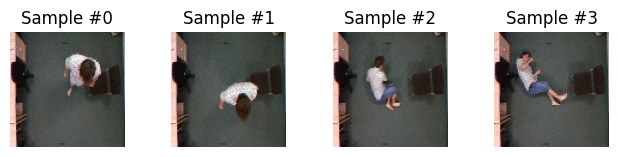

In [ ]:
fig = plt.figure()

for i, sample in enumerate(test_dataset):
    print("sample #",i, sample['image'].shape, sample['class'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 3:
        plt.show()
        break

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
model = CNN()
lossfn= nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
total_epochs=30
for epoch in range(total_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for data in train_loader:
        img, label = data['image'], data['class']
        img = img[0].permute(2, 0, 1).float()
        out = model(img)
        loss = lossfn(out[0][0], label[0].float())
        pred = (out > 0.5).float()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 3 == 0:
        print(f'Epoch[{epoch+1}/{total_epochs}], loss: {loss.item():.6f}')
    model.eval()


Epoch[1/30], loss: 0.381128
Epoch[4/30], loss: 0.063580
Epoch[7/30], loss: 0.006393
Epoch[10/30], loss: 0.001497
Epoch[13/30], loss: 0.000228
Epoch[16/30], loss: 0.000210
Epoch[19/30], loss: 0.000132
Epoch[22/30], loss: 0.010787
Epoch[25/30], loss: 0.000256
Epoch[28/30], loss: 0.000759
